In [2]:
# Danh sách những từ cần loại ra khỏi văn bản
black_list = set([
    'the', 'of', 'and', 'to', 'in', 'was', 'that', 'a', 
    'had', 'with', 'but', 'he', 'she', 'not', 
    'as', 'will', 'from', 'on', 'be', 'it', 'which',
    'for', 'his', 'him', 'at', 'who', 'by', 'have',
    'would', 'is', 'been', 'when', 'they', 'there', 'we', 'are',
    'our', 'if', 'her', 'were', 'than', 'this', 'what', 'so',
    'yet', 'more', 'their', 'them', 'or', 'could', 'an', 'can',
    'said', 'may', 'do', 'these', 'shall', 'how', 'shall', 'asked',
    'before', 'those', 'whom', 'even', 'its', 'did', 'then',
    'into', 'any', 'nor', 'himself', 'one', 'all', 'no', 'yes'
    'now', 'upon', 'only', 'might', 'every', 'own', 'such', 'towards',
    'again', 'most', 'ever', 'where', 'after', 'up', 'soon', 'many',
    'also', 'like', 'over', 'us', 'thus', 'has', 'about', 'No.']
    + [str(x) for x in range(1000)])  # numbers

In [6]:
import re

def co_occurrence_network(text):
    G = nx.Graph()
    
    sentences = text.split('.')
    
    for s in sentences:
        clean = re.sub('[^\w\n ]+', '', s).lower()
        clean = re.sub('_+', '', clean).strip()
        words = re.split('\s+', clean)
        for v in words:
            try:
                G.nodes[v]['count'] += 1
            except KeyError:
                G.add_node(v)
                G.nodes[v]['count'] = 1
            for w in words:
                if v == w or v in black_list or w in black_list:
                    continue
                if len(v) == 0 or len(w) == 0:
                    continue
                try:
                    G.edges[v, w]['count'] += 1
                except KeyError:
                    G.add_edge(v, w, count=1)
    return G

In [11]:
from matplotlib import pyplot as plt
plt.rcParams.update({
    'figure.figsize': (15, 15),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})

from numpy import random as nprand
import random
nprand.seed(100)
random.seed(100)

import networkx as nx

In [7]:
with open('../data\\vncovid19wikipedia.txt', encoding='utf8') as f:
    text = f.read()

G = co_occurrence_network(text)

In [8]:
len(G.nodes)

718

In [9]:
len(G.edges)

8445

(-0.1, 0.1)

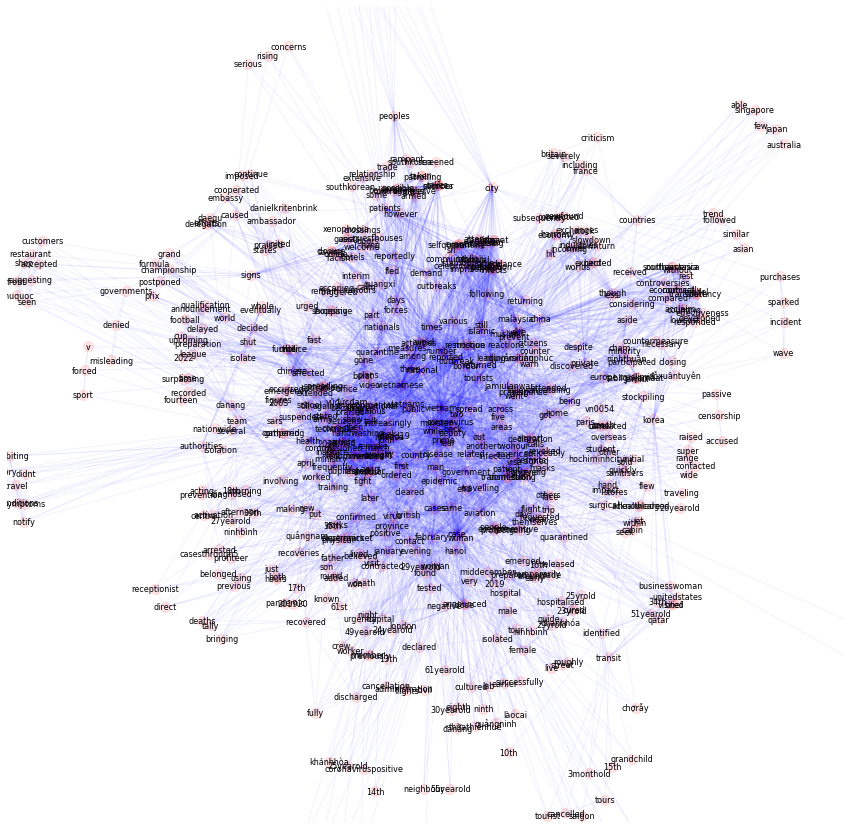

In [14]:
pos=nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, alpha=0.1, node_size = 100, node_color = 'red')

nx.draw_networkx_edges(G, pos, edge_color="blue", alpha=0.05)

nx.draw_networkx_labels(G, pos, font_size = 8)

plt.xlim([-0.1,0.1]); plt.ylim([-0.1, 0.1])

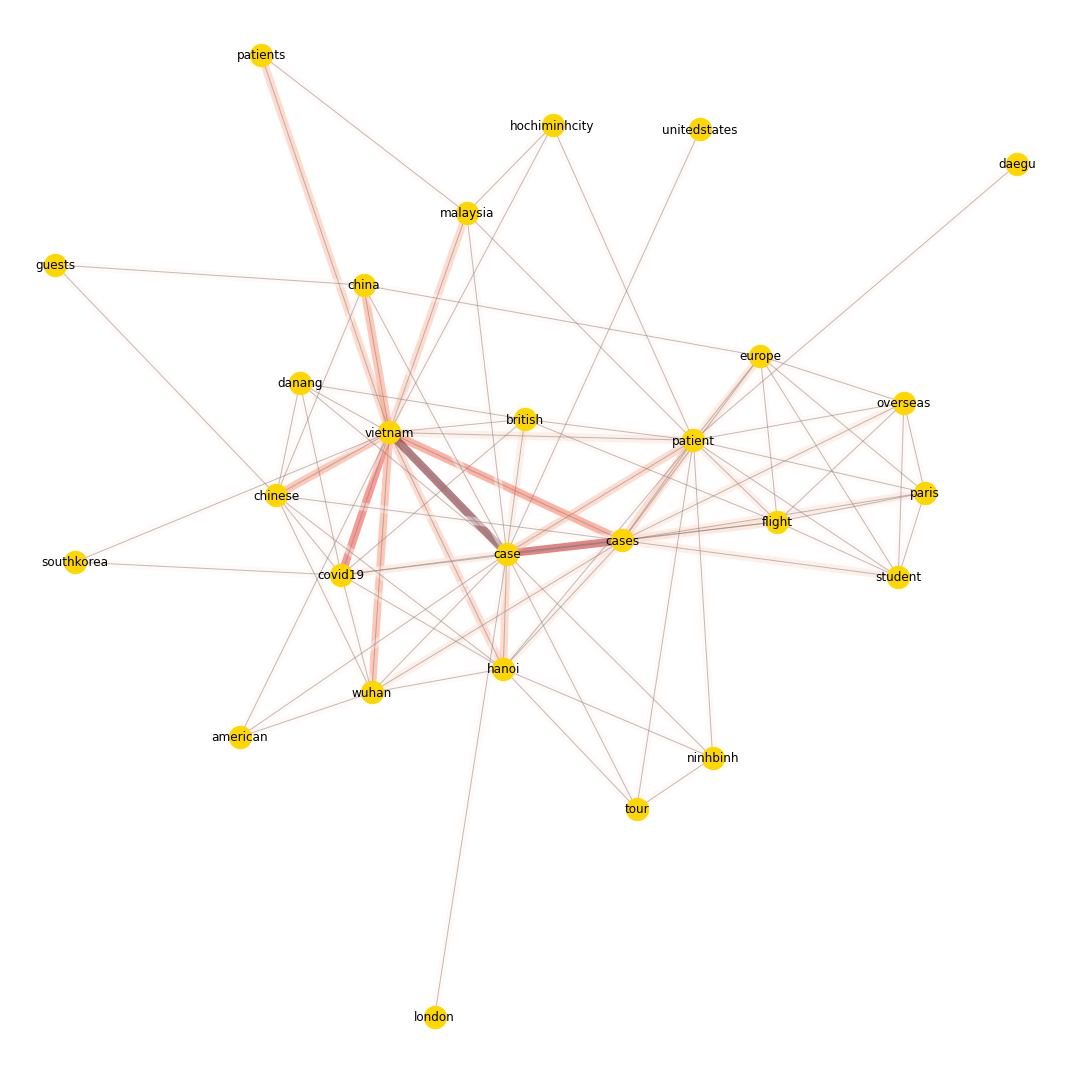

In [16]:
characters = ['case', 'cases', 'patient', 'patients', 'wuhan', 'vietnam',
              'china', 'chinese', 'student', 'students', 'guests',
              'daegu','foreign', 'europe', 'london',
              'overseas', 'tour', 'hotel','flight','british','paris','uk',
              'italy','unitedstates', 'american','america',
              'southkorea','malaysia','covid19',
             'hochiminhcity','hanoi','danang','ninhbinh','vinhphuc']

G_focus = G.subgraph(characters)
counts = [G_focus.edges[e]['count'] for e in G_focus.edges]
pos = nx.spring_layout(G_focus)


plt.figure()
nx.draw_networkx_nodes(G_focus, pos, node_color = 'gold', node_size = 500)

nx.draw_networkx_edges(
    G_focus, pos, width=8,
    edge_color=counts, edge_cmap=plt.cm.Reds, alpha=0.5)

nx.draw_networkx_edges(G_focus, pos, edge_color="#7f7f7f",alpha=0.5)

nx.draw_networkx_labels(G_focus, pos)
plt.tight_layout()